In [9]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Note: using Google CoLab


In [10]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
from keras import optimizers

In [11]:
# Download MINST
(x_train,x_test), (y_train,y_test) = mnist.load_data()

In [12]:
# Print shape
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [13]:
# Data pre-processing
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255
y_train = y_train.reshape(-1,28,28,1).astype('float32')/255

x_test = to_categorical(x_test)
y_test = to_categorical(y_test)

In [14]:
LR_function=ReduceLROnPlateau(monitor='val_accuracy',
                patience=10,  # 10 epochs 內acc沒下降就要調整LR
                verbose=1,
                factor=0.5, # LR降為0.5
                min_lr=0.00001 # 最小 LR 到0.00001就不再下降     
                )                                    

In [15]:
# Build neural network
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy',  metrics=['accuracy'])

history = model.fit(x_train, x_test, validation_data=(y_train,y_test), callbacks=[LR_function], verbose=2, epochs=100)

Epoch 1/100
1875/1875 - 7s - loss: 0.1449 - accuracy: 0.9554 - val_loss: 0.0601 - val_accuracy: 0.9852 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.0502 - accuracy: 0.9844 - val_loss: 0.0448 - val_accuracy: 0.9875 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 7s - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0354 - val_accuracy: 0.9909 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 4/100
1875/1875 - 7s - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0283 - val_accuracy: 0.9925 - lr: 0.0010 - 7s/epoch - 4ms/step
Epoch 5/100
1875/1875 - 6s - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0342 - val_accuracy: 0.9888 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 6s - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0279 - val_accuracy: 0.9917 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0290 - val_accuracy: 0.9919 - lr: 0.0010 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 6s - loss:

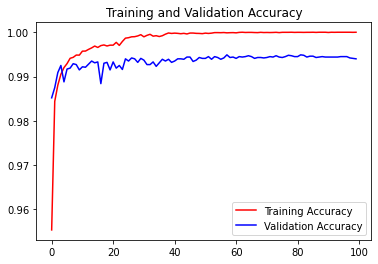

Accuracy mean:0.9981931674480439.
Validation accuracy mean:0.9935350000858307.


In [19]:
epochs=range(100)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'r-',label='Training Accuracy')
plt.plot(epochs,val_acc,'b-',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

print(f"Accuracy mean:{np.mean(acc)}.")
print(f"Validation accuracy mean:{np.mean(val_acc)}.")

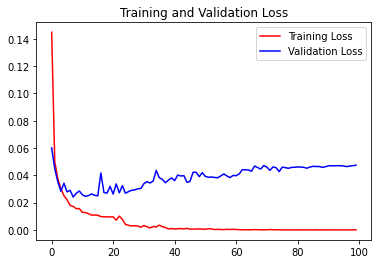

Loss mean:0.005743305818700719.
Validation loss mean:0.038880591485649346.


In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss,'r-',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print(f"Loss mean:{np.mean(loss)}.")
print(f"Validation loss mean:{np.mean(val_loss)}.")